
# Project: TMDb Movie Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project,i will be analysizing a movie dataset named "TMDb Movie Data".This data set contains information about 10,000 movies collected fromThe Movie Database (TMDb). The dataset was downloaded from kaggle 
1. id: A unique identifier for each movie
2. imdb_id: unique identifier for each movies in TMDb
3. popularity: A numeric quantity specifying the movie popularity
4. budget:The budget in which the movie was made
5. revenue: The worldwide revenue generated by the movie
6. original_title: The title of the movie before translation or adaptation
7. cast: Name of the lead and supporting actors
8. homepage: Linl to the home page of the movie
9. director: The director of the movie
10. keywords: Keywords or tags related to the movie
11. overview: Brief description of the movie
12. running time: Running time of movies in minutes
13. genre: The genre of the movie such as: Action,Comedy, Thriller e.t.c
14. tagline: Movie tagline
15. production_companies: The production house of the movie
16. release_date: The date on which it was released
17. vote_count: number of the vote ratings the movie received
18. vote_average: average ratings the movie received
19. release_year: the year the movie was released
20. budget_adj: Shows the budget of the associated movies in terms of 2010 dollars
21. revenue_adj: Shows the revenue of the associated movie in terms of 2010 dollars



### Question(s) for Analysis
1)Which genre of movie made the highest profit?
1b) Which genres of movie is most popular?

2)Which Production Company made the highest profit?

3)In what year was the highest profit recorded?

4)What's the average runtime in year 2015?

5)What's the correlation between profit and revenue?


In [1]:
#importing packages needed for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Loading the data and printing out few line to have an insight on the structure of the data 
df=pd.read_csv(r'C:\Users\user\Downloads\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
df.shape

(10866, 21)

The dataset contains 10,866 rows and 21 columns

In [5]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
#Summary statistics 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning
- Dropping columns that won't be used for the analysis.
- Dropping null values.
- Dropping duplicates values
- Extracting the first word in the column of:cast,genre,production_companies
- Creating a new columns named 'profit'

In [8]:
#dropping of some columns
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','release_date','budget','revenue'],axis=1, inplace=True)

In [9]:
#checking if changes has been made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   runtime               10866 non-null  int64  
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  budget_adj            10866 non-null  float64
 11  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB


In [10]:
#Replacing 'budget_adj' value of 0 to NaN
df['budget_adj']=df['budget_adj'].replace(0,np.nan)

In [11]:
#Replacing 'revenue_adj' value of 0 to NaN
df['revenue_adj']=df['revenue_adj'].replace(0,np.nan)

In [12]:
#returns the total null values found in each columns
df.isna().sum()*100/len(df)

popularity               0.000000
original_title           0.000000
cast                     0.699429
director                 0.404933
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj              52.420394
revenue_adj             55.365360
dtype: float64

In [13]:
#Removing the null values found in columns containing null values
df.dropna(subset=['cast','director','genres','production_companies','budget_adj','revenue_adj'],inplace=True)

In [14]:
#checking if changes has been done
df.isna().sum()

popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [15]:
#Drop any duplicates 
df.drop_duplicates(inplace=True)

In [16]:
#Checking if changes has been done
df.duplicated().sum()

0

In [17]:
df.nunique()

popularity              3803
original_title          3760
cast                    3784
director                1683
runtime                  136
genres                  1043
production_companies    3005
vote_count              1274
vote_average              53
release_year              56
budget_adj              2076
revenue_adj             3800
dtype: int64

In [18]:
#Extracting the first word in the cast column
df['cast']=df['cast'].str.split(pat='|',expand=True)[0]

In [19]:
#Extracting the first word in the genre column
df['genres']=df['genres'].str.split(pat='|',expand=True)[0]

In [20]:
#Extracting the first word in the production_companies column
df['production_companies']=df['production_companies'].str.split(pat='|',expand=True)[0]

In [21]:
#Creating a new column called 'profit'
df['profit']=df['revenue_adj']-df['budget_adj']

In [22]:
#Checking if changes has been made
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,Village Roadshow Pictures,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,Summit Entertainment,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,Lucasfilm,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel,James Wan,137,Action,Universal Pictures,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


<a id='eda'></a>
## Exploratory Data Analysis

In [23]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03,3.805000e+03
mean,1.203784,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08,9.399617e+07
std,1.480569,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08,1.950332e+08
min,0.010335,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,0.470651,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07,-1.420000e+06
50%,0.810805,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07,2.851334e+07
75%,1.387163,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08,1.090266e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


From this descriptive analysis, we could decude that most of the movies(75%) were released in 2010

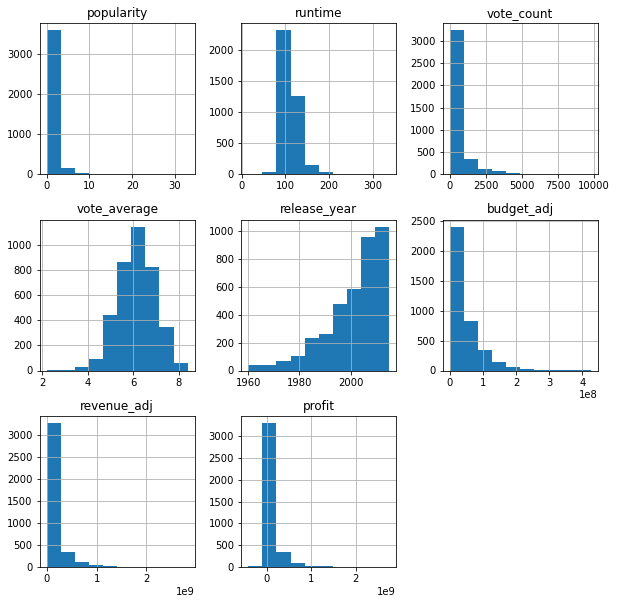

In [24]:
df.hist(figsize=(10,10))
plt.show()

In describing the shape of data based on the histogram distribution, it's noticed that only the distribution of released year is skewed to the left (Negatively-skewed) while the distribution of Revenue_adj, Budget_adj,vote count and popularity is skewed to the right (positively_skewed). Only vote average has a Normal distribution (i.e it's symmetric)

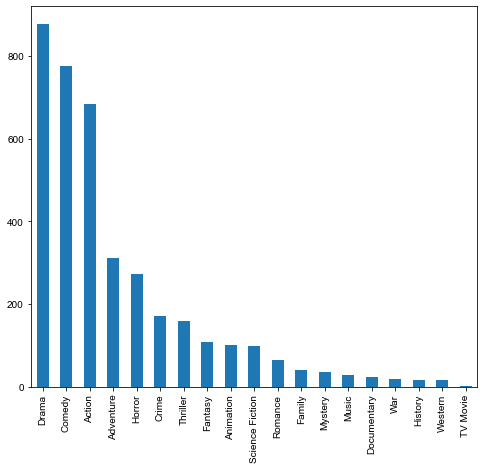

In [25]:
#frequency of each genre of movie
df['genres'].value_counts().plot(kind='bar',figsize=(8,7))
sns.set_style("darkgrid")
plt.show()

In [26]:
df['director'].value_counts().head(10)

Steven Spielberg     27
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Martin Scorsese      17
Steven Soderbergh    17
Tim Burton           16
Oliver Stone         15
Renny Harlin         15
Brian De Palma       15
Name: director, dtype: int64

In [27]:
df.groupby(['director','release_year'])['profit'].sum().nlargest()

director          release_year
George Lucas      1977            2.750137e+09
James Cameron     2009            2.586237e+09
                  1997            2.234714e+09
William Friedkin  1973            2.128036e+09
Steven Spielberg  1975            1.878643e+09
Name: profit, dtype: float64

### Question 1: Which genres of music recorded the highest profit?

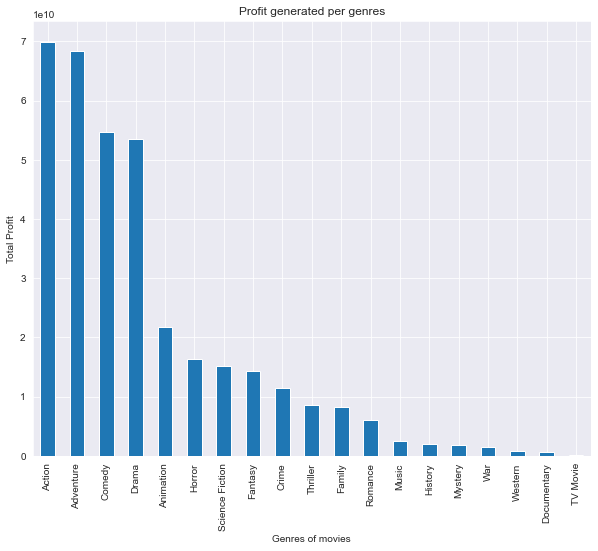

In [28]:
df.groupby('genres')['profit'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,8))
plt.title('Profit generated per genres')
plt.xlabel('Genres of movies')
plt.ylabel('Total Profit')
sns.set_style("darkgrid")
plt.show()

### Question 1b: Which genres of movie is most popular?

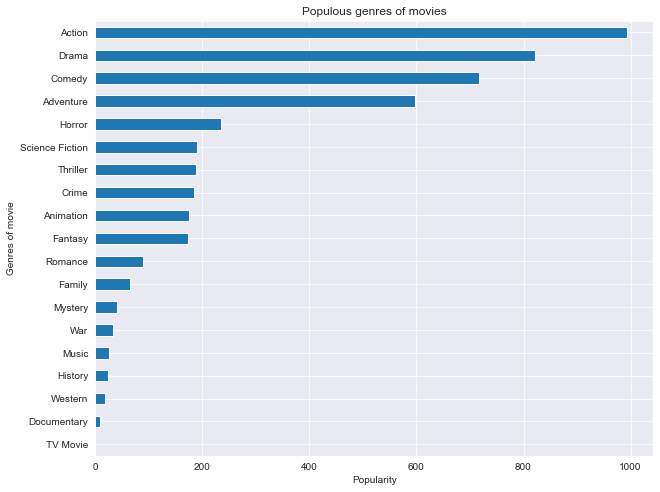

In [29]:
df.groupby('genres')['popularity'].sum().sort_values(ascending=True).plot(kind='barh', title='Populous genres of movies', figsize=(10,8))
plt.ylabel('Genres of movie')
plt.xlabel('Popularity')
sns.set_style("darkgrid")
plt.show()

In [30]:
df[df['genres']=='Action']['production_companies'].value_counts().head(10)

Universal Pictures                        66
Paramount Pictures                        55
Twentieth Century Fox Film Corporation    46
Columbia Pictures                         40
New Line Cinema                           27
Warner Bros.                              18
Village Roadshow Pictures                 15
Silver Pictures                           12
DreamWorks SKG                            11
Miramax Films                             10
Name: production_companies, dtype: int64

### Question 2: Which Production Company has the highest profit?

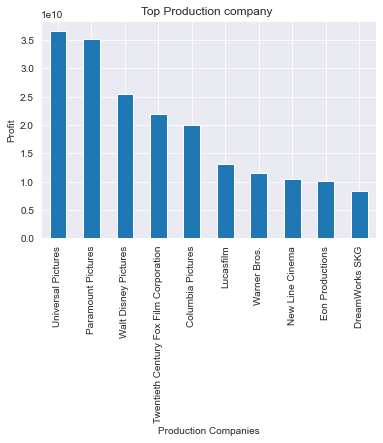

In [31]:
df.groupby('production_companies')['profit'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top Production company ')
plt.xlabel('Production Companies')
plt.ylabel('Profit')
plt.show()

### Question 3: In what year was the highest profit recorded?

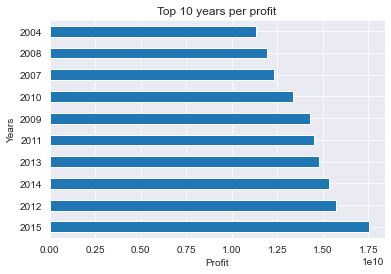

In [32]:
#Top 10 years with highest profit
df.groupby('release_year')['profit'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 years per profit')
plt.xlabel('Profit')
plt.ylabel('Years')
plt.show()

### Question 4: What's the average run time in year 2015?

In [33]:
df[df['release_year']==2015]['runtime'].mean()

110.86875

### Analysis

In [34]:
#Checking for the title of the movie that made the highest profit in 2015
df[df['release_year']==2015][['original_title','profit']].nlargest(n=10, columns='profit')

,original_title,profit
3,Star Wars: The Force Awakens,1.718723e+09
0,Jurassic World,1.254446e+09
4,Furious 7,1.210949e+09
14,Avengers: Age of Ultron,1.035032e+09
8,Minions,9.961120e+08
9,Inside Out,6.244116e+08
10,Spectre,5.848204e+08
25,Mission: Impossible - Rogue Nation,4.897435e+08
23,Fifty Shades of Grey,4.872791e+08
19,The Hunger Games: Mockingjay - Part 2,4.512814e+08


In [35]:
#Checking which genres of movie is'Star Wars:Thwe Force Awakens'
df[df['original_title']=='Star Wars: The Force Awakens']['genres']

3    Action
Name: genres, dtype: object

In [36]:
#Checking which production produce is'Star Wars:Thwe Force Awakens'
df[df['original_title']=='Star Wars: The Force Awakens']['production_companies']

3    Lucasfilm
Name: production_companies, dtype: object

In [37]:
df[df['original_title']=='Star Wars: The Force Awakens']['director']

3    J.J. Abrams
Name: director, dtype: object

## Question 5: What's the correlation  between revenue and profit?

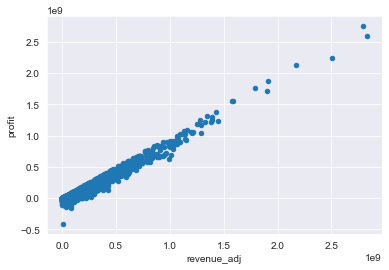

In [38]:
df.plot(x='revenue_adj', y='profit',kind="scatter")
plt.show()

There is a strong positive correlation between revenue and profit.The relationship between revenue and profit is directly
prportional relationship. An increase in revenue would lead to an increase in the profit made.

## Conclusions

#### From the analysis below are the key insight gotten from the questions asked during the analysis:
- Action movies made the highest profit across all genres of movies. The top 5 genre of movies that makes high profit include: Action, Adventure, Comedy, Drama, Animation so if the sole propose of the movie is to make profit then most movies produced should be centered around the top 5 movies.
- 'Steven Spielberg' is the director with most movies that made high profit.
- In year 2015,the highest profit was made across all year, in which "Star Wars: The Force Awakens" was the title of the movie and hence it's an action movie produced by Lucas film.
- The top five production companies of the high profit movies: are Universal Pictures,Paramount Pictures,Walt Disney Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures.


- Popularity, production companies, director, genre of movies are criteria to be considered to make high profitable movies. In order to make high profit in movies, most movies should advertised in all advertizing platform and the snapshot of the movies should be with a catching scenes that attract the audience. Also, the movie should be centered on action, adventure, comedy, drama, animation movies. Production companies like Universal Pictures,Paramount Pictures,Walt Disney Pictures,Twentieth Century Fox Film Corporation,Columbia Pictures should be the one in charged of production.




## Limitations

After a thorough exploratory analysis, I realized the analysis is biased due to the insufficient dataset provided.During the
cleaning process, I observed that more than 50% values in revenue_adj and budget_adj contain zero values which was assumed to be null because in reality, revenue and budget can never be zero. All the entries that has zeros value was replaced with NaN and dropped. The significance removal of >50% makes interpretation bias.

The entries in the: cast, genre and directors fields has >1 values joined together with '|' so i had to split the values 
by extracting only the first entires in  each of the three columns